In [ ]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/Program_1_Dataset.csv')
data.head()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3


In [ ]:
data.isnull().sum()

Crime_Rate          0
Zone_proportion     0
Non_Retail_Acres    0
CHAS                0
NOX                 0
Avg_rooms           0
AGE                 0
Distance            0
RAD                 0
Property_TaxRate    0
PTRATIO             0
B                   0
LSTAT               0
MValue              0
dtype: int64

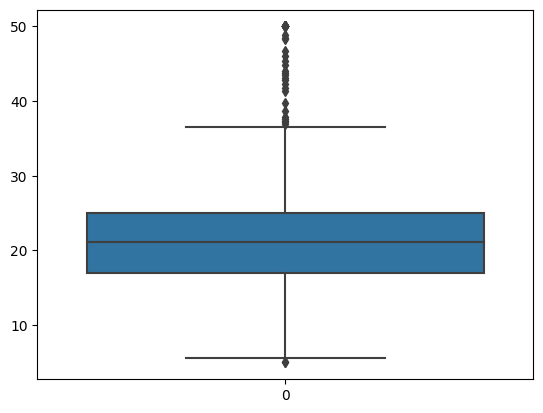

<Axes: >

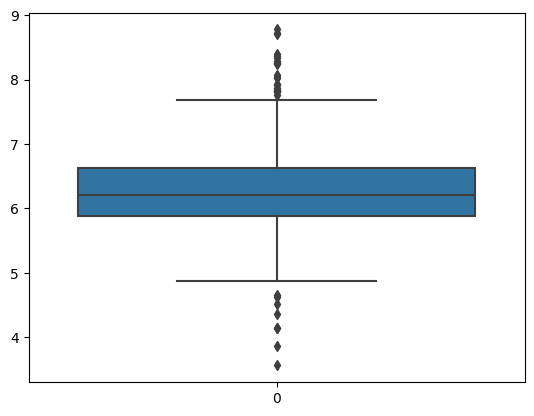

In [ ]:
import seaborn as sns
sns.boxplot(data['MValue'])
plt.show()
sns.boxplot(data['Avg_rooms '])

In [ ]:
import numpy as np
from scipy import stats
def drop_outlier(data,col_name):
  print(data.shape)
  z = np.abs(stats.zscore(col_name))
  data.drop(data.index[np.where(abs(z)>2.5)],inplace=True)
  print("New data shape post deletion: "+str(data.shape))
drop_outlier(data,data['MValue'])
drop_outlier(data,data['Avg_rooms '])

(506, 14)
New data shape post deletion: (485, 14)
(485, 14)
New data shape post deletion: (470, 14)


In [ ]:
x=data['Avg_rooms ']
y=data['MValue']
mean=y.mean()
mean

21.14170212765957

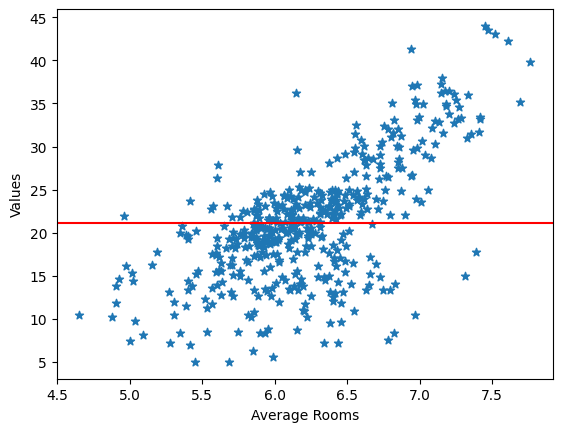

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x,y,marker='*')
plt.axhline(y=mean,color='red')
plt.annotate("Value",xy=(1,mean+2.5))
plt.xlabel("Average Rooms")
plt.ylabel("Values")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3,random_state=2)

In [ ]:
Training=pd.DataFrame(list(zip(X_train,Y_train)),columns=['Avg_rooms ','MValue'])
Testing=pd.DataFrame(list(zip(X_test,Y_test)),columns=['Avg_rooms ','MValue'])

In [ ]:
x=Training['Avg_rooms ']
y=Training['MValue']
xy=x*y
n=len(data)
xmean=x.mean()
ymean=y.mean()
numerator=xy.sum()-n*xmean*ymean
denominator=(x**2).sum()-n*(xmean**2)
m=numerator/denominator
c=ymean-(m*xmean)
print('Intercept:',c,'Coefficient:',m)

Intercept: 0.5778099933838412 Coefficient: 3.3057938542428835


In [ ]:
best_fit=c+m*Training['Avg_rooms ']
Training['best']=best_fit
Training['error']=Training['best']-Training['MValue']
Training['mean']=Training['MValue'].mean()
Training.head()

,Avg_rooms,MValue,best,error,mean
0,6.549,27.1,22.227454,-4.872546,21.142249
1,6.209,21.4,21.103484,-0.296516,21.142249
2,5.747,8.5,19.576207,11.076207,21.142249
3,6.431,18.0,21.837370,3.837370,21.142249
4,6.142,15.2,20.881996,5.681996,21.142249


Text(0.5, 1.0, 'Best Fit Model')

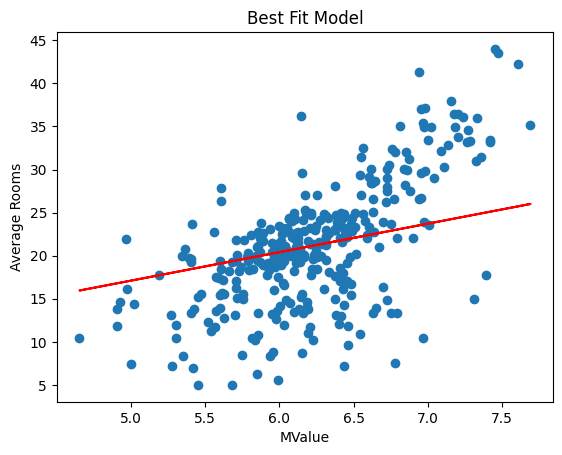

In [ ]:
fig,ax=plt.subplots()
ax.scatter(x='Avg_rooms ',y='MValue',data=Training)
ax.plot(Training['Avg_rooms '],Training['best'],color='red')
ax.set_ylabel('Average Rooms')
ax.set_xlabel('MValue')
ax.set_title("Best Fit Model")

In [ ]:
SST=sum((Training['mean']-Training['MValue'])**2)
SST

16766.82273556231

In [ ]:
SSE=sum(Training['error']**2)
SSE

12393.075293748294

In [ ]:
SSR=SST-SSE
SSR

4373.7474418140155

In [ ]:
RSQ=SSR/SST
RSQ

0.2608572602450987

In [ ]:
MSE=SSE/len(Training)
MSE

37.66892186549634

In [ ]:
best_fit=c+m*Testing['Avg_rooms ']
Testing['best']=best_fit
Testing['error']=Testing['best']-Testing['MValue']
Testing['mean']=Testing['MValue'].mean()
Testing.head()

,Avg_rooms,MValue,best,error,mean
0,6.426,23.8,21.820841,-1.979159,21.140426
1,6.657,17.2,22.584480,5.384480,21.140426
2,6.127,23.9,20.832409,-3.067591,21.140426
3,5.874,20.3,19.996043,-0.303957,21.140426
4,6.398,25.0,21.728279,-3.271721,21.140426


Text(0.5, 1.0, 'Best Fit Model')

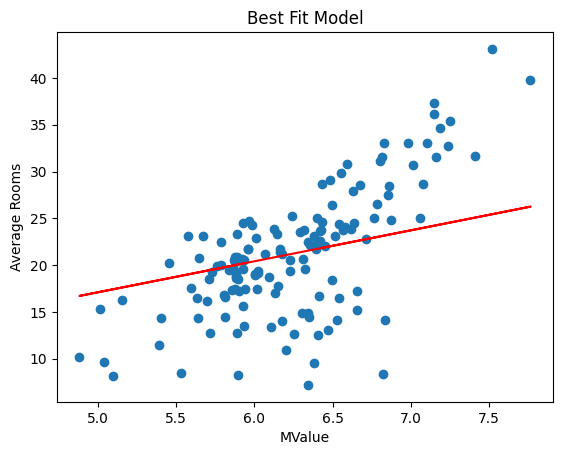

In [ ]:
fig,ax=plt.subplots()
ax.scatter(x='Avg_rooms ',y='MValue',data=Testing)
ax.plot(Testing['Avg_rooms '],Testing['best'],color='red')
ax.set_ylabel('Average Rooms')
ax.set_xlabel('MValue')
ax.set_title("Best Fit Model")

In [ ]:
SST1=sum((Testing['mean']-Testing['MValue'])**2)
SST1

6402.219574468087

In [ ]:
SSE1=sum(Testing['error']**2)
SSE1

4563.1487842243205

In [ ]:
SSR1=SST1-SSE1
SSR1

1839.0707902437662

In [ ]:
RSQ1=SSR1/SST1
RSQ1

0.2872551884315153

In [ ]:
MSE1=SSE1/len(Testing)
MSE1

32.36275733492426

In [ ]:
X=data[['Avg_rooms ']]
Y=data['MValue']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3,random_state=2)

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
print('Intercept:',model.intercept_,'Coefficient:',model.coef_)

Intercept: -33.10380019799918 Coefficient: [8.72021137]


In [ ]:
best_fit=model.intercept_+model.coef_*data['Avg_rooms ']
data['best']=best_fit

Text(0.5, 1.0, 'Best Fit Model')

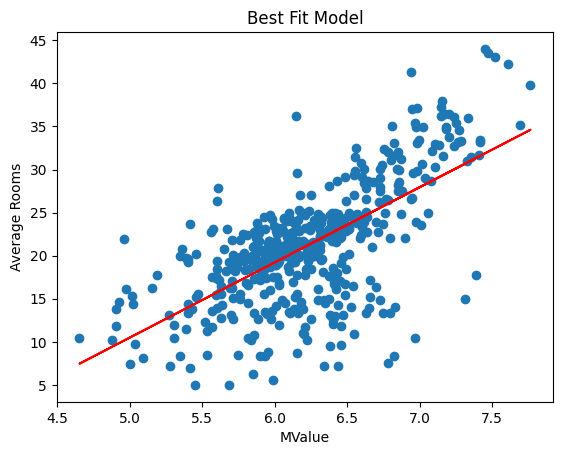

In [ ]:
fig,ax=plt.subplots()
ax.scatter(x='Avg_rooms ',y='MValue',data=data)
ax.plot(data['Avg_rooms '],data['best'],color='red')
ax.set_ylabel('Average Rooms')
ax.set_xlabel('MValue')
ax.set_title("Best Fit Model")

In [ ]:
RSQ2=model.score(x_test,y_test)
RSQ2

0.4757500909104647